#### Задача 1
Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, выборочную дисперсию, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [2]:
import numpy as np
salary = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])
salary

array([100,  80,  75,  77,  89,  33,  45,  25,  65,  17,  30, 230,  24,
        57,  55,  70,  75,  65,  84,  90, 150])

Выборочное среднее зарплат:
$\overline{X} = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n x_i$    

In [3]:
mean_salary = salary.sum() / salary.shape[0]
mean_salary

73.14285714285714

In [4]:
#Метод mean
salary.mean()

73.14285714285714

Выборочная дисперсия. Несмещенный вариант.
$\sigma_X^2 = \dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2$

In [7]:
(((salary - mean_salary)**2).sum())/(salary.shape[0] - 1)

2241.828571428571

In [11]:
#Функция var
salary.var(ddof=1)

2241.828571428571

Среднее квадратичное отклонение.
$\sigma_X = \sqrt{\dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right)^2}$

In [13]:
np.sqrt((((salary - mean_salary)**2).sum())/(salary.shape[0] - 1))

47.347952135531386

In [15]:
#Функция std
salary.std(ddof=1)

47.347952135531386

#### Задача 2

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выбросы в выборке (используя для этого метод как при построении "усов" из boxplot).

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

##### Медиана

In [27]:
sort_salary = sorted(salary) # сортируем

length_sal = len(sort_salary) # измеряем длинну 
length_sal

21

Если выборка имеет нечётный размер, то медианой будет элемент, стоящий на позиции [𝑛/2]+1.

In [28]:
length_sal//2 + 1 # номер элемента
median = sort_salary[(length_sal//2 + 1)- 1] #ищем элемент в выборке по индексу, для этого вычитаем единицу, так как нумерация начинается с нуля.
median = sort_salary[(length_sal//2)] # так как выборка имеет не четное количество элементов
median

70

In [29]:
#Проверка с помощью встроенной функции median()
np.median(salary)

70.0

In [25]:
#Посмотрим, сколько процентов выборки лежат слева и справа от медианы
(salary <= median).sum() / length_sal, (salary >= median).sum() / length_sal

(0.5238095238095238, 0.5238095238095238)

#### Квартили, интерквартильное расстояние

In [26]:
length_sal % 4

1

На  4  не делится. Значит, квартиль придётся на конкретный элемент, а именно элемент с индексом length_sal // 4 (поскольку индексация происходит с нуля).

In [35]:
#Первый квартиль
q_1 = sort_salary[length_sal//4]
q_1

45

In [34]:
#Проверяем соотношение выборки относительно первого квартиля
(salary <= q_1).sum() / length_sal, (salary >= q_1).sum() / length_sal

(0.2857142857142857, 0.7619047619047619)

In [39]:
#Проверяем с помощью встроенной функции
np.quantile(salary, 0.25)

45.0

In [41]:
#Третий квартиль вычисляется аналогично, но будет стоять на позиции 3 * length_sal // 4
q_3 = sort_salary[3*length_sal//4]
q_3

84

In [42]:
#Проверяем соотношение выборки относительно первого квартиля
(salary <= q_3).sum() / length_sal, (salary >= q_3).sum() / length_sal

(0.7619047619047619, 0.2857142857142857)

In [43]:
#Проверяем с помощью встроенной функции
np.quantile(salary, 0.75)

84.0

In [45]:
#Интерквартильный размах
np.quantile(salary, [0.25, 0.75]) #Интервал между первым и третьим квартилем. [q_1, q_3]

array([45., 84.])

##### Выбросы в выборке 
Используя для этого метод как при построении "усов" из boxplot

In [69]:
from matplotlib import pyplot as plt
import pandas as pd
df_sal = pd.DataFrame(salary, columns = ['sal'])
df_sal.head()

,sal
0,100
1,80
2,75
3,77
4,89


<AxesSubplot:>

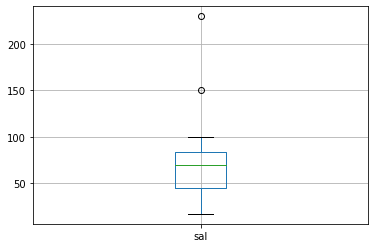

In [58]:
df_sal.boxplot()

<AxesSubplot:xlabel='sal'>

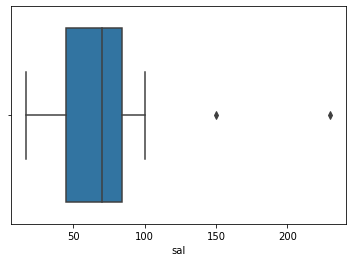

In [62]:
import seaborn as sns
sns.boxplot(df_sal['sal'])

In [71]:
#Находим границы отрезка усов.
q1 = df_sal['sal'].quantile(0.25)
q3 = df_sal['sal'].quantile(0.75)

iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-13.5, 142.5)

In [73]:
outliers = df_sal.loc[(df_sal['sal'] < boxplot_range[0]) | (df_sal['sal'] > boxplot_range[1])]

outliers.shape[0] #Находим сколько значений из датафрейма (выбросов), которые выходят за границы отрезка.

2

In [74]:
outliers 

,sal
11,230
20,150


#### Задача 3

В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:
1. студент учится на факультете A,
2. студент учится на факультете B,
3. студент учится на факультете C?

Замечание: да, эта задача не на тему статистики, но тема важная, и её стоит иногда освежать в памяти.

Пусть событие $D$ заключается в том, что первая сессия сдана. Кроме того, пусть для каждого $i \in \{ a, b, c \}$ событие $H_i$ заключается в том, что сдал сессию студент одного из факультетов.

В такой формулировке наша задача — найти вероятность $P(H_a | D)$. Верятность, что сдал первую сессию студент факультета А. $P(H_b | D)$. Верятность, что сдал первую сессию студент факультета B. $P(H_c | D)$. Верятность, что сдал первую сессию студент факультета C.
По формуле Байеса:
$$P(H_i|D) = \frac{P(D|H_i) \cdot P(H_i)}{P(D)}.$$

$$P(D) = P(D | H_a) \cdot P(H_a) + P(D | H_b) \cdot P(H_b) + P(D | H_c) \cdot P(H_c).$$

Всего студентов $100+90+45 = 235$

$P(D | H_a) = 0.6$ Вероятность, что студент с факультета А сдаст.  

$P(H_a) = 100/235 = 0.01$ Любой студент с факультета А.

$P(D | H_b) = 0.7$  Вероятность, что студент с факультета B сдаст. 

$ P(H_b) = 90/235 $ Любой студент с факультета B.

$P(D | H_c) = 0.8$  Вероятность, что студент с факультета C сдаст.  

$P(H_c) = 45/235 $ Любой студент с факультета C.


$P(D) = 0.6 \cdot 100/235 + 0.7 \cdot 90/235 + 0.8 \cdot 45/235$

In [91]:
P_D = (0.6*100/235) + (0.7*90/235) + (0.8*45/235) #Вероятность, что кто-то из студентов с любого факультета сдаст первую сессию.
P_D

0.676595744680851

$$P(H_a|D) = \frac{P(D|H_a) \cdot P(H_a)}{P(D)}.$$
$$P(H_a|D) = \frac{0.6 \cdot 0.01}{0.0316}.$$

In [92]:
P_Ha = 0.6*100/235/P_D
P_Ha

0.3773584905660377

$$P(H_b|D) = \frac{P(D|H_b) \cdot P(H_b)}{P(D)}.$$
$$P(H_a|D) = \frac{0.7 \cdot 1/90}{0.0316}.$$

In [93]:
P_Hb = 0.7*90/235/P_D
P_Hb

0.39622641509433953

$$P(H_c|D) = \frac{P(D|H_c) \cdot P(H_c)}{P(D)}.$$
$$P(H_c|D) = \frac{0.8 \cdot 1/45}{0.0316}.$$

In [94]:
P_Hc = 0.8*45/235/P_D
P_Hc

0.22641509433962265

Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:

студент учится на факультете A,
студент учится на факультете B,
студент учится на факультете C?

Вероятность, что это студент факультета А  P_Ha = 0.37

Вероятность, что это студент факультета B  P_Hb = 0.39

Вероятность, что это студент факультета C  P_Hc = 0.22

###### Ответ: Наиболее вероятно, что это студент факультета B.